In [84]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [85]:
array_n = [100] * 5 + [1000] * 5 + [10000] * 5 + [100000] * 5
heap_n = [100] * 5 + [1000] * 5 + [10000] * 5 + [100000] * 5 + [1000000] * 5
array_n = np.array(array_n)
heap_n = np.array(heap_n)

In [93]:
array_t = [0.001, 0.000, 0.001, 0.000, 0.001] + [0.030, 0.029, 0.032, 0.031, 0.031] + \
    [3.301, 3.594, 3.740, 3.037, 3.355] + [453.738, 442.823, 405.106, 486.951, 541.400]
heap_t = [0.000, 0.000, 0.016, 0.001, 0.001] + [0.004, 0.009, 0.018, 0.002, 0.009] + \
    [0.170, 0.182, 0.144, 0.200, 0.161] + [2.810, 3.108, 3.080, 2.980, 3.098] + [45.574, 72.019, 39.436, 33.247, 32.865]
array_t = np.array(array_t)
heap_t = np.array(heap_t)

array_t_mill = array_t * 1000
heap_t_mill = heap_t * 1000

In [133]:
# Construct the design matrix here.  It should be a NumPy array.
def basis(n, x):
    return np.array([x**i for i in range(n + 1)]) #+ np.array([np.log(x)])

def log_basis(n, x):
    return np.array([1, x, np.log(x), x * np.log(x)])

def log_design_matrix(n, x):
    return np.array([log_basis(n, i) for i in x])

def design_matrix(n, x):
    return np.array([basis(n, i) for i in x])
    
def f(x, c_hat):
    deg = len(c_hat) - 1
    return basis(deg, x) @ c_hat

def log_f(x, c_hat):
    deg = len(c_hat) - 1
    return log_basis(deg, x) @ c_hat

# Compute the sum-of-squares error function for the polynomial g(x) here.
def sse(g, x, y):
    return sum((y - g(x))**2)

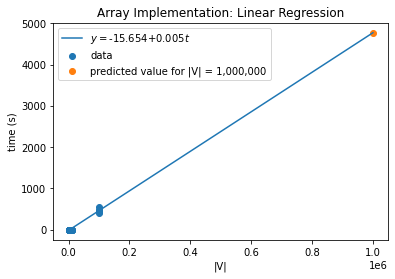

params: [-1.5654086e+01  4.7889878e-03]
sse: 16459.129347813494


In [153]:
# combine array_n and array_t into a single array
data_arr = np.array([array_n, array_t]).T

X = design_matrix(1, data_arr[:, 0])
# Set up and solve the normal equations here.
c_hat = np.linalg.solve(X.T @ X, X.T @ (data_arr[:, 1]))
# Taking the least-squares solution you obtain, plug it into f(x,c) to defined a function g(x). 

g = lambda x: f(x, c_hat)
g = np.vectorize(g)

# Plot the graph of the function g(x) along with a scatterplot of the data points.
x_s = np.linspace(0, 1000000, 200)
plt.plot(x_s, g(x_s))
plt.scatter(data_arr[:,0], (data_arr[:, 1]))
plt.scatter(1000000, g(1000000))
plt.title("Array Implementation: Linear Regression")
plt.legend([f"$y = ${c_hat[0]:.3f}$ + ${c_hat[1]:.3f}$t$", "data", 'predicted value for |V| = 1,000,000'])
plt.xlabel("|V|")
plt.ylabel("time (s)")
plt.show()

print(f"params: {c_hat}")
print(f"sse: {sse(g, data_arr[:, 0], (data_arr[:, 1]))}")

In [148]:
print(f"predicted time for 1,000,000 vertices using the array implmentation: {g(1000000):.3f} s")

predicted time for 1,000,000 vertices using the array implmentation: 4773.334 s


In [149]:
4773.334 / 60

79.55556666666666

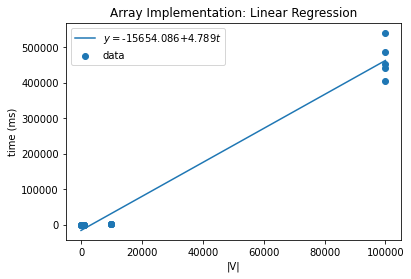

params: [-1.5654086e+04  4.7889878e+00]
sse: 16459129347.813492


In [135]:
# combine array_n and array_t into a single array
data_arr = np.array([array_n, array_t_mill]).T

X = design_matrix(1, data_arr[:, 0])
# Set up and solve the normal equations here.
c_hat = np.linalg.solve(X.T @ X, X.T @ (data_arr[:, 1]))
# Taking the least-squares solution you obtain, plug it into f(x,c) to defined a function g(x). 

g = lambda x: f(x, c_hat)
g = np.vectorize(g)

# Plot the graph of the function g(x) along with a scatterplot of the data points.
x_s = np.linspace(0, 100000, 200)
plt.plot(x_s, g(x_s))
plt.scatter(data_arr[:,0], (data_arr[:, 1]))
plt.title("Array Implementation: Linear Regression")
plt.legend([f"$y = ${c_hat[0]:.3f}$ + ${c_hat[1]:.3f}$t$", "data"])
plt.xlabel("|V|")
plt.ylabel("time (ms)")
plt.show()

print(f"params: {c_hat}")
print(f"sse: {sse(g, data_arr[:, 0], (data_arr[:, 1]))}")

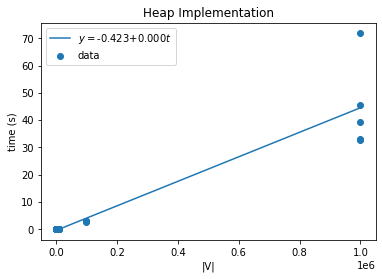

params: [-4.22810063e-01  4.49472148e-05]
sse: 1053.4570066139372


In [144]:
# combine array_n and array_t into a single array
data_arr = np.array([heap_n, heap_t]).T

X = design_matrix(1, data_arr[:, 0])
# Set up and solve the normal equations here.
c_hat = np.linalg.solve(X.T @ X, X.T @ (data_arr[:, 1]))
# Taking the least-squares solution you obtain, plug it into f(x,c) to defined a function g(x). 

g = lambda x: f(x, c_hat)
g = np.vectorize(g)

# Plot the graph of the function g(x) along with a scatterplot of the data points.
x_s = np.linspace(0, 1000000, 200)
plt.plot(x_s, g(x_s))
plt.scatter(data_arr[:,0], (data_arr[:, 1]))
plt.title("Heap Implementation")
plt.legend([f"$y = ${c_hat[0]:.3f}$ + ${c_hat[1]:.3f}$t$", "data"])
plt.xlabel("|V|")
plt.ylabel("time (s)")
plt.show()

print(f"params: {c_hat}")
print(f"sse: {sse(g, data_arr[:, 0], (data_arr[:, 1]))}")

C:\Users\bkweb\AppData\Local\Temp\ipykernel_6936\3324533133.py:6: RuntimeWarning: divide by zero encountered in log
  return np.array([1, x, np.log(x), x * np.log(x)])
C:\Users\bkweb\AppData\Local\Temp\ipykernel_6936\3324533133.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([1, x, np.log(x), x * np.log(x)])


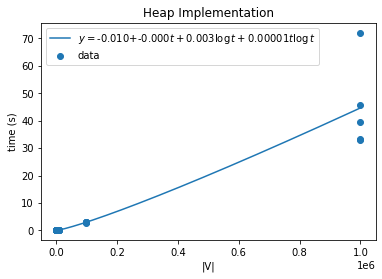

params: [-9.81174629e-03 -4.35076495e-05  2.95105781e-03  6.37724376e-06]
sse: 1046.0792013222763


In [141]:
# combine array_n and array_t into a single array
data_arr = np.array([heap_n, heap_t]).T

X = log_design_matrix(1, data_arr[:, 0])
# Set up and solve the normal equations here.
c_hat = np.linalg.solve(X.T @ X, X.T @ (data_arr[:, 1]))
# Taking the least-squares solution you obtain, plug it into f(x,c) to defined a function g(x). 

g = lambda x: log_f(x, c_hat)
g = np.vectorize(g)

# Plot the graph of the function g(x) along with a scatterplot of the data points.
x_s = np.linspace(0, 1000000, 200)
plt.plot(x_s, g(x_s))
plt.scatter(data_arr[:,0], (data_arr[:, 1]))
plt.title("Heap Implementation")
plt.legend([f"$y = ${c_hat[0]:.3f}$ + ${c_hat[1]:.3f}$t + ${c_hat[2]:.3f}$\log t +${c_hat[3]:.5f}$t\log t$", "data"])
plt.xlabel("|V|")
plt.ylabel("time (s)")
plt.show()

print(f"params: {c_hat}")
print(f"sse: {sse(g, data_arr[:, 0], (data_arr[:, 1]))}")

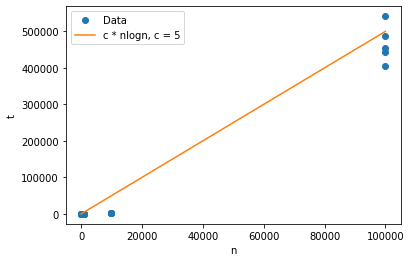

In [95]:
x = np.linspace(0, 100000, 1000)
y = x

plt.plot(array_n, array_t_mill, 'o', label='Data')
for c in [5]:
    plt.plot(x, c * y, label=f'c * nlogn, c = {c}')
plt.xlabel('n')
plt.ylabel('t')
plt.legend()
plt.show()

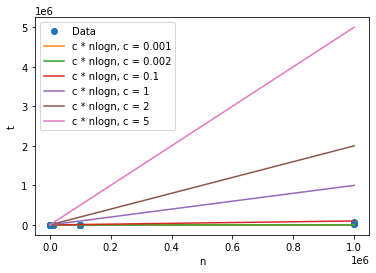

In [82]:
x = np.linspace(0, 1000000, 1000)
y = x

plt.plot(heap_n, 1000 * heap_t, 'o', label='Data')
for c in [.001, .002, .1, 1, 2, 5]:
    plt.plot(x, c * y, label=f'c * nlogn, c = {c}')
plt.xlabel('n')
plt.ylabel('t')
plt.legend()
plt.show()